## Jialin Shi  --  Banknote Authentication Classification

### Passive Learning
##### Method:
Train a SVM with a pool of 10 randomly selected data points from the training set.    
Select the penalty parameter using 10-fold cross validation.    
Repeat this process by adding 10 other randomly selected data points to the pool.

### Active Learning
##### Method:
Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool.     
Repeat this process by adding 10 other randomly selected data points to the pool.

Compare Passive and Active learning.


###### Monter Carlo m=50
Average the 50 test errors for each of the incrementally trained 90 SVMs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split  # split data for training and testing
from sklearn.preprocessing import StandardScaler      # standardScaler,uniformed
from sklearn.metrics import confusion_matrix                         
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics import hamming_loss
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import SpectralClustering

In [4]:
# (a) Load Data (random 472 data ponits for test, remaining 900 as train)
df= pd.read_csv('data_banknote_authentication.csv',header=None)

train,test=train_test_split(df,test_size=0.344)
train_x=train.iloc[:,:-1]
train_y=train.iloc[:,-1]
test_x=test.iloc[:,:-1]
test_y=test.iloc[:,-1]

# Normalize data
transformer = Normalizer().fit(train_x)
train_x=pd.DataFrame(transformer.transform(train_x),index=train.index)
test_x=pd.DataFrame(transformer.transform(test_x),index=test.index)

#### Passive Learning

In [107]:
rand10=train.sample(n=10)
rand_index=rand10.index
train_new=train.drop(index=rand_index)

# Set the parameters by cross-validation
tuned_parameters = [{'tol': [1e1,1e0,1e-1,1e-2,1e-3,1e-4],
                     'C': [1, 10, 100, 1000,10000,100000]}]

for i in range(89):
    rand10=pd.concat([rand10,train_new.sample(n=10)])
    rand10_y=pd.DataFrame(rand10.iloc[:,-1],index=rand10.index)
    rand10_x=pd.DataFrame(transformer.transform(rand10.iloc[:,:-1]),index=rand10.index)

    #build model
    LSVC=LinearSVC(penalty='l1',dual=False)
    clf = GridSearchCV(LSVC, tuned_parameters, cv=10).fit(rand10_x, rand10_y)
    h=clf.best_params_
    
    bestC=h['C']
    tol0=h['tol']
    clf =LinearSVC(penalty='l1',dual=False,C=bestC,tol=tol0).fit(rand10_x, rand10_y)
    pred=clf.predict(test_x)
    print('\nsize: ',len(rand10_x),h,"    test-accuracy :",1-hamming_loss(test_y, pred))
    

    rand_index=rand10_x.index
    train_new=train.drop(index=rand_index) 
    print('remain train: ',len(train_new))


size:  20 {'C': 1, 'tol': 0.1}     test-accuracy : 0.972457627118644
remain train:  880

size:  30 {'C': 1, 'tol': 0.1}     test-accuracy : 0.972457627118644
remain train:  870

size:  40 {'C': 1, 'tol': 0.1}     test-accuracy : 0.9639830508474576
remain train:  860

size:  50 {'C': 1, 'tol': 0.1}     test-accuracy : 0.9661016949152542
remain train:  850

size:  60 {'C': 10, 'tol': 0.01}     test-accuracy : 0.9915254237288136
remain train:  840

size:  70 {'C': 10, 'tol': 0.01}     test-accuracy : 0.9978813559322034
remain train:  830

size:  80 {'C': 10, 'tol': 0.01}     test-accuracy : 0.9978813559322034
remain train:  820

size:  90 {'C': 10, 'tol': 0.1}     test-accuracy : 0.9978813559322034
remain train:  810

size:  100 {'C': 10, 'tol': 0.001}     test-accuracy : 0.9978813559322034
remain train:  800

size:  110 {'C': 10, 'tol': 0.01}     test-accuracy : 0.9978813559322034
remain train:  790

size:  120 {'C': 10, 'tol': 0.001}     test-accuracy : 0.9978813559322034
remain train:


size:  900 {'C': 10, 'tol': 0.001}     test-accuracy : 0.9957627118644068
remain train:  0


#### Active learning

In [63]:
# (a) Load Data 
train,test=train_test_split(df,test_size=0.344)
train_x=train.iloc[:,:-1]
train_y=train.iloc[:,-1]
test_x=test.iloc[:,:-1]
test_y=test.iloc[:,-1]

# Normalize data
transformer = Normalizer().fit(train_x)
train_x=pd.DataFrame(transformer.transform(train_x),index=train.index)
test_x=pd.DataFrame(transformer.transform(test_x),index=test.index)

rand10=train.sample(n=10)
while len(rand10.iloc[:,-1].unique())==1:
    rand10=train.sample(n=10)    
rand_index=rand10.index
train_new=train.drop(index=rand_index)

# 10+10
rand10=pd.concat([rand10,train_new.sample(n=10)])
rand10_y=pd.DataFrame(rand10.iloc[:,-1],index=rand10.index)
rand10_x=pd.DataFrame(transformer.transform(rand10.iloc[:,:-1]),index=rand10.index)

In [64]:
# Set the parameters by cross-validation
tuned_parameters = [{'tol': [1e1,1e0,1e-1,1e-2,1e-3,1e-4],
                     'C': [1, 10, 100, 1000,10000,100000]}]
#build model
LSVC=LinearSVC(penalty='l1',dual=False)
clf = GridSearchCV(LSVC, tuned_parameters, cv=10).fit(rand10_x, rand10_y)
h=clf.best_params_
bestC=h['C']
tol0=h['tol']
clf =LinearSVC(penalty='l1',dual=False,C=bestC,tol=tol0).fit(rand10_x, rand10_y)
pred=clf.predict(test_x)
print('\nsize: ',len(rand10_x),h,"    test-accuracy :",1-hamming_loss(test_y, pred))

rand_index=rand10.index
train_new=train.drop(index=rand_index)

len(train_new)


size:  20 {'C': 1, 'tol': 0.01}     test-accuracy : 0.9745762711864406


880

In [65]:
confidence= clf.decision_function(train_new.iloc[:,:-1])
confidence=confidence*confidence
confidence=confidence.tolist()

index = map(confidence.index, heapq.nsmallest(10, confidence))
close_10_index=list(index)
data_10=train_new.iloc[close_10_index,:]

In [68]:
for i in range(88):
    # 10+10
    rand10=pd.concat([rand10,data_10])
    rand10_y=pd.DataFrame(rand10.iloc[:,-1],index=rand10.index)
    rand10_x=pd.DataFrame(transformer.transform(rand10.iloc[:,:-1]),index=rand10.index)

    #build model
    LSVC=LinearSVC(penalty='l1',dual=False)
    clf = GridSearchCV(LSVC, tuned_parameters, cv=10).fit(rand10_x, rand10_y)
    h=clf.best_params_

    bestC=h['C']
    tol0=h['tol']
    clf =LinearSVC(penalty='l1',dual=False,C=bestC,tol=tol0).fit(rand10_x, rand10_y)
    pred=clf.predict(test_x)
    print('\nsize: ',len(rand10_x),h,"    test-accuracy :",1-hamming_loss(test_y, pred))

    rand_index=rand10.index
    train_new=train.drop(index=rand_index)
    
    if len(train_new)>0:
        confidence= clf.decision_function(train_new.iloc[:,:-1])
        confidence=confidence*confidence
        confidence=confidence.tolist()

        index = map(confidence.index, heapq.nsmallest(10, confidence))
        close_10_index=list(index)
        data_10=train_new.iloc[close_10_index,:]
        
    print('remain train: ',len(train_new))


size:  30 {'C': 10, 'tol': 0.1}     test-accuracy : 0.9809322033898306
remain train:  870

size:  40 {'C': 1, 'tol': 0.1}     test-accuracy : 0.972457627118644
remain train:  860

size:  50 {'C': 1, 'tol': 0.1}     test-accuracy : 0.972457627118644
remain train:  850

size:  60 {'C': 1, 'tol': 0.1}     test-accuracy : 0.972457627118644
remain train:  840

size:  70 {'C': 1, 'tol': 0.1}     test-accuracy : 0.9703389830508474
remain train:  830

size:  80 {'C': 1, 'tol': 0.1}     test-accuracy : 0.9682203389830508
remain train:  820

size:  90 {'C': 1, 'tol': 0.1}     test-accuracy : 0.9682203389830508
remain train:  810

size:  100 {'C': 1, 'tol': 0.1}     test-accuracy : 0.9682203389830508
remain train:  800

size:  110 {'C': 1, 'tol': 0.1}     test-accuracy : 0.9682203389830508
remain train:  790

size:  120 {'C': 1, 'tol': 0.1}     test-accuracy : 0.9682203389830508
remain train:  780

size:  130 {'C': 1, 'tol': 0.1}     test-accuracy : 0.9682203389830508
remain train:  770

size:  

#### Monte Carlo Simulation m=50

In [70]:
# b-i 50
score=[]

for m in range(50):
    print(m)
    l=[]
    rand10=train.sample(n=10)
    rand_index=rand10.index
    train_new=train.drop(index=rand_index)

    # Set the parameters by cross-validation
    tuned_parameters = [{'tol': [1e1,1e0,1e-1,1e-2,1e-3,1e-4],
                         'C': [1, 10, 100, 1000,10000,100000]}]

    for i in range(89):
        rand10=pd.concat([rand10,train_new.sample(n=10)])
        rand10_y=pd.DataFrame(rand10.iloc[:,-1],index=rand10.index)
        rand10_x=pd.DataFrame(transformer.transform(rand10.iloc[:,:-1]),index=rand10.index)

        #build model
        LSVC=LinearSVC(penalty='l1',dual=False)
        clf = GridSearchCV(LSVC, tuned_parameters, cv=10).fit(rand10_x, rand10_y)
        h=clf.best_params_

        bestC=h['C']
        tol0=h['tol']
        clf =LinearSVC(penalty='l1',dual=False,C=bestC,tol=tol0).fit(rand10_x, rand10_y)
        pred=clf.predict(test_x)
        l.append(1-hamming_loss(test_y, pred))

        rand_index=rand10_x.index
        train_new=train.drop(index=rand_index) 
        

    score.append(l)
score=pd.DataFrame(score)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [71]:
score.columns=range(20,910,10)
score

,20,30,40,50,60,70,80,90,100,110,...,810,820,830,840,850,860,870,880,890,900
0,0.961864,0.980932,0.974576,0.978814,0.980932,0.980932,0.983051,0.980932,0.978814,0.987288,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
1,0.980932,0.980932,0.976695,0.978814,0.976695,0.976695,0.978814,0.978814,0.978814,0.978814,...,0.993644,0.993644,0.991525,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
2,0.980932,0.987288,0.987288,0.987288,0.993644,0.989407,0.991525,0.991525,0.993644,0.993644,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
3,0.980932,0.987288,0.976695,0.976695,0.987288,0.976695,0.968220,0.974576,0.993644,0.993644,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
4,0.919492,0.902542,0.980932,0.980932,0.980932,0.991525,0.985169,0.934322,0.989407,0.989407,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
5,0.813559,0.811441,0.961864,0.985169,0.985169,0.987288,0.987288,0.987288,0.987288,0.987288,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
6,0.860169,0.959746,0.987288,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
7,0.978814,0.951271,0.980932,0.980932,0.976695,0.980932,0.976695,0.978814,0.978814,0.989407,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
8,0.959746,0.906780,0.966102,0.970339,0.970339,0.978814,0.980932,0.978814,0.978814,0.989407,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
9,0.983051,0.974576,0.980932,0.974576,0.985169,0.976695,0.985169,0.983051,0.985169,0.985169,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644


In [72]:
# b-ii
# (a) Load Data 
train,test=train_test_split(df,test_size=0.344)
train_x=train.iloc[:,:-1]
train_y=train.iloc[:,-1]
test_x=test.iloc[:,:-1]
test_y=test.iloc[:,-1]

# Normalize data
transformer = Normalizer().fit(train_x)
train_x=pd.DataFrame(transformer.transform(train_x),index=train.index)
test_x=pd.DataFrame(transformer.transform(test_x),index=test.index)

score2=[]

for m in range(50):
    print(m)
    l=[]
    rand10=train.sample(n=10)
    while len(rand10.iloc[:,-1].unique())==1:
        rand10=train.sample(n=10)    
    rand_index=rand10.index
    train_new=train.drop(index=rand_index)

    # 10+10
    rand10=pd.concat([rand10,train_new.sample(n=10)])
    rand10_y=pd.DataFrame(rand10.iloc[:,-1],index=rand10.index)
    rand10_x=pd.DataFrame(transformer.transform(rand10.iloc[:,:-1]),index=rand10.index)

    #build model
    LSVC=LinearSVC(penalty='l1',dual=False)
    clf = GridSearchCV(LSVC, tuned_parameters, cv=10).fit(rand10_x, rand10_y)
    h=clf.best_params_

    bestC=h['C']
    tol0=h['tol']
    clf =LinearSVC(penalty='l1',dual=False,C=bestC,tol=tol0).fit(rand10_x, rand10_y)
    pred=clf.predict(test_x)
#     print('\nsize: ',len(rand10_x),h,"    test-accuracy :",1-hamming_loss(test_y, pred))
    l.append(1-hamming_loss(test_y, pred))

    rand_index=rand10.index
    train_new=train.drop(index=rand_index)

    
    confidence= clf.decision_function(train_new.iloc[:,:-1])
    confidence=confidence*confidence
    confidence=confidence.tolist()

    index = map(confidence.index, heapq.nsmallest(10, confidence))
    close_10_index=list(index)
    data_10=train_new.iloc[close_10_index,:]
    
    for i in range(88):
        # 10+10
        rand10=pd.concat([rand10,data_10])
        rand10_y=pd.DataFrame(rand10.iloc[:,-1],index=rand10.index)
        rand10_x=pd.DataFrame(transformer.transform(rand10.iloc[:,:-1]),index=rand10.index)

        #build model
        LSVC=LinearSVC(penalty='l1',dual=False)
        clf = GridSearchCV(LSVC, tuned_parameters, cv=10).fit(rand10_x, rand10_y)
        h=clf.best_params_

        bestC=h['C']
        tol0=h['tol']
        clf =LinearSVC(penalty='l1',dual=False,C=bestC,tol=tol0).fit(rand10_x, rand10_y)
        pred=clf.predict(test_x)
#         print('\nsize: ',len(rand10_x),h,"    test-accuracy :",1-hamming_loss(test_y, pred))
        l.append(1-hamming_loss(test_y, pred))

        rand_index=rand10.index
        
        train_new=train.drop(index=rand_index)
        
        
        if len(train_new)>0:
            confidence= clf.decision_function(train_new.iloc[:,:-1])
            confidence=confidence*confidence
            confidence=confidence.tolist()

            index = map(confidence.index, heapq.nsmallest(10, confidence))
            close_10_index=list(index)
            data_10=train_new.iloc[close_10_index,:]
        

    score2.append(l)
score2=pd.DataFrame(score2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [73]:
score2.columns=range(20,910,10)
score2

,20,30,40,50,60,70,80,90,100,110,...,810,820,830,840,850,860,870,880,890,900
0,0.872881,0.898305,0.978814,0.976695,0.974576,0.972458,0.970339,0.968220,0.968220,0.970339,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
1,0.957627,0.983051,0.983051,0.983051,0.983051,0.985169,0.985169,0.985169,0.985169,0.985169,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.991525,0.993644,0.993644,0.993644
2,0.902542,0.959746,0.963983,0.908898,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
3,0.963983,0.953390,0.966102,0.942797,0.961864,0.961864,0.853814,0.921610,0.925847,0.961864,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
4,0.923729,0.953390,0.925847,0.925847,0.919492,0.980932,0.991525,0.991525,0.987288,0.991525,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
5,0.858051,0.961864,0.993644,0.993644,0.991525,0.987288,0.972458,0.957627,0.961864,0.959746,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
6,0.838983,0.957627,0.991525,0.991525,0.983051,0.968220,0.991525,0.991525,0.991525,0.991525,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
7,0.970339,0.906780,0.972458,0.961864,0.961864,0.961864,0.961864,0.959746,0.959746,0.961864,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
8,0.974576,0.976695,0.980932,0.972458,0.974576,0.980932,0.974576,0.980932,0.974576,0.980932,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644
9,0.881356,0.904661,0.974576,0.980932,0.989407,0.993644,0.993644,0.993644,0.993644,0.993644,...,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644,0.993644


In [74]:
mean_score=score.describe().iloc[1,:]
mean_score2=score2.describe().iloc[1,:]

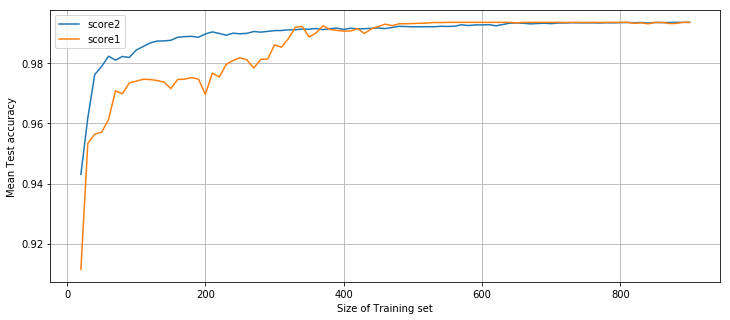

In [76]:
# Learning Curve- test error/ size of training set
plt.figure(figsize=[12,5])
plt.plot(range(20,910,10),mean_score,label='score2')
plt.plot(range(20,910,10),mean_score2,label='score1')
#plt.xticks(np.arange(10,220,10))
plt.legend()
plt.grid()
plt.xlabel('Size of Training set')
plt.ylabel('Mean Test accuracy')
plt.show()